In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('churn.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
features = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)

features = pd.get_dummies(features, columns=["Geography", "Gender"])

In [7]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [8]:
features.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [9]:
target = df['Exited']

In [10]:
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [15]:
X_train[1]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 , -0.99850112,  1.72572313,
       -0.57638802, -0.91324755,  0.91324755])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [17]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
lr_predictions = lr_model.predict(X_test)

lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

lr_accuracy

0.811

In [20]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy}")
  print(f"\n Classification Report:\n{classification_report(y_test, y_pred)}")
  print("------------")

  with open(filename, "wb") as file:
    pickle.dump(model, file)

  print(f"Model saved as {filename}\n")

In [21]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model = SVC(random_state=42, probability=True)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

gb_model = GradientBoostingClassifier(random_state=42)
evaluate_and_save_model(gb_model, X_train, X_test, y_train, y_test, "gb_model.pkl")

sc_model = StackingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model), ('svm', svm_model)])
evaluate_and_save_model(sc_model, X_train, X_test, y_train, y_test, "sc_model.pkl")

XGBClassifier Accuracy: 0.7455

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

------------
Model saved as xgb_model.pkl

DecisionTreeClassifier Accuracy: 0.785

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

------------
Model saved as dt_model.pkl

RandomForestClassifier Accuracy: 0.8645

 Classification Report:
              precision    recall  f1-score   support

           0       0.

In [22]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

feature_importances_df

,feature,importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [23]:
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


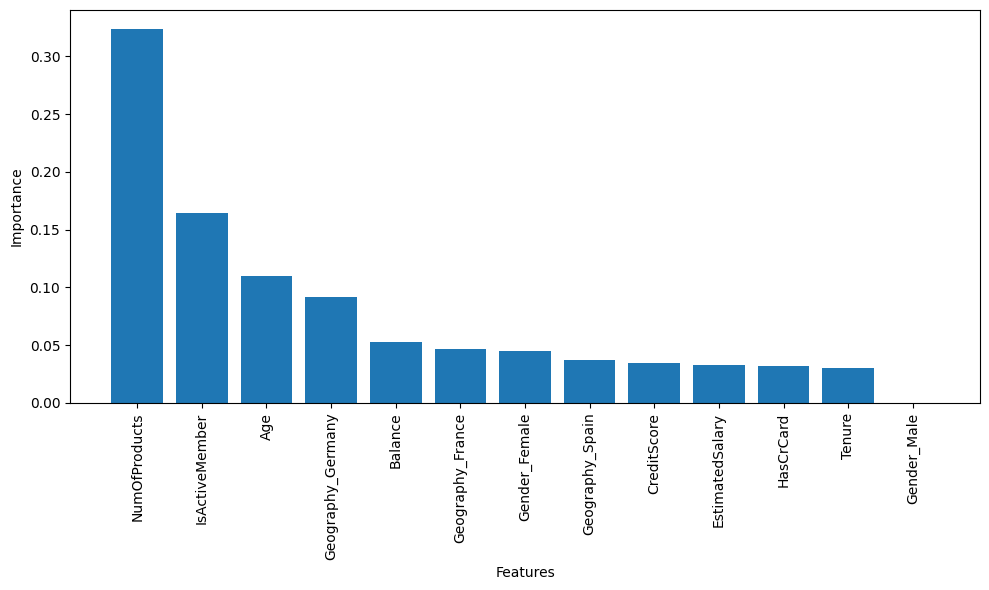

In [24]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [25]:
'''
features['HasBalance'] = (df['Balance'] > 0).astype(int)

features['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=[300, 600, 700, 850], labels=['Low', 'Medium', 'High'])

features['ProductUsageIntensity'] = df['NumOfProducts'] / (df['Tenure'] + 1)

features['SalaryCategory'] = pd.cut(df['EstimatedSalary'], bins=[0, 50000, 100000, 200000], labels=['LowIncome', 'MiddleIncome', 'HighIncome'])

features['TenureCategory'] = pd.cut(df['Tenure'], bins=[0, 3, 6, 10],  labels=['New', 'Established', 'Loyal'])

features['NetWorth'] = df['Balance'] + df['EstimatedSalary']

features['ActivityScore'] = (df['NumOfProducts'] * 0.5 + df['IsActiveMember'] * 0.3 + df['HasCrCard'] * 0.2)
'''

features['CLV'] = df['Balance'] * df['EstimatedSalary'] / 100000

features['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=["Young", "MiddleAge", "Senior", "Elderly"])

features['TenureAgeRatio'] = df["Tenure"] / df["Age"]

features = pd.get_dummies(features, drop_first=True)

In [26]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,0.071429,True,False,False


In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,234438.927360,0.095238,True,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,98551.287635,0.125000,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,207633.662148,0.333333,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,56131.190581,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,48367.430996,0.148148,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,185487.067788,0.186047,True,False,False


In [28]:
xgboost_model = xgb.XGBClassifier(random_state=42)

evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost-featureEngineered.pkl")

XGBClassifier Accuracy: 0.854

 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

------------
Model saved as xgboost-featureEngineered.pkl



In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.8545

 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

------------
Model saved as xgboost-SMOTE.pkl



In [30]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('xgboost', xgb.XGBClassifier(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('svm', SVC(random_state=42, probability=True))],
    voting='hard'
)

evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_clf.pkl")

VotingClassifier Accuracy: 0.853

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.63      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

------------
Model saved as voting_clf.pkl

